In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

In [2]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(80,80),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score

In [4]:
#reading excle file
df = pd.read_excel('Mini_protein_data_HA_BOT_combined_for_ml.xlsx')

In [5]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4','Len','Core_res_F','Core_res_l','Core_res_Y','Core_res_w','Core_res_I','Core_total','Positive_charge_H','Positive_charge_K','Positive_charge_R','Positive_total','Negative_charge_D','Negative_charge_E','Negative_total'], axis = 1)
Y = df['Category']
X = pd.get_dummies(X, prefix_sep='_')

In [6]:
#Data Spliting into Training and Testing
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=4)

Testing Original Data ML performance
Random Forest Accuracy for the Raw Data: 0.8250585480093677
Confusion matrix, without normalization
[[6356  136   23   14   28]
 [ 284  317  102   40   44]
 [ 127  195  120   42   33]
 [ 104   78   45  160   60]
 [  75   24   15   25   93]]
Normalized confusion matrix
[[0.96934574 0.02074119 0.0035077  0.00213512 0.00427025]
 [0.36086404 0.40279543 0.1296061  0.05082592 0.05590851]
 [0.24564797 0.37717602 0.23210832 0.08123791 0.06382979]
 [0.23266219 0.17449664 0.10067114 0.35794183 0.13422819]
 [0.32327586 0.10344828 0.06465517 0.10775862 0.40086207]]


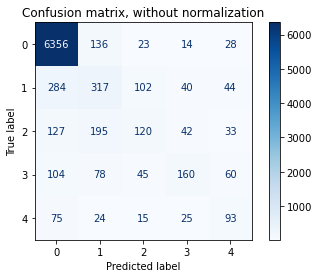

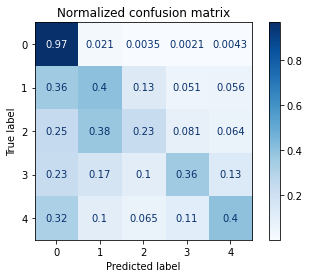

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6557
           1       0.42      0.40      0.41       787
           2       0.39      0.23      0.29       517
           3       0.57      0.36      0.44       447
           4       0.36      0.40      0.38       232

    accuracy                           0.83      8540
   macro avg       0.53      0.47      0.49      8540
weighted avg       0.80      0.83      0.81      8540



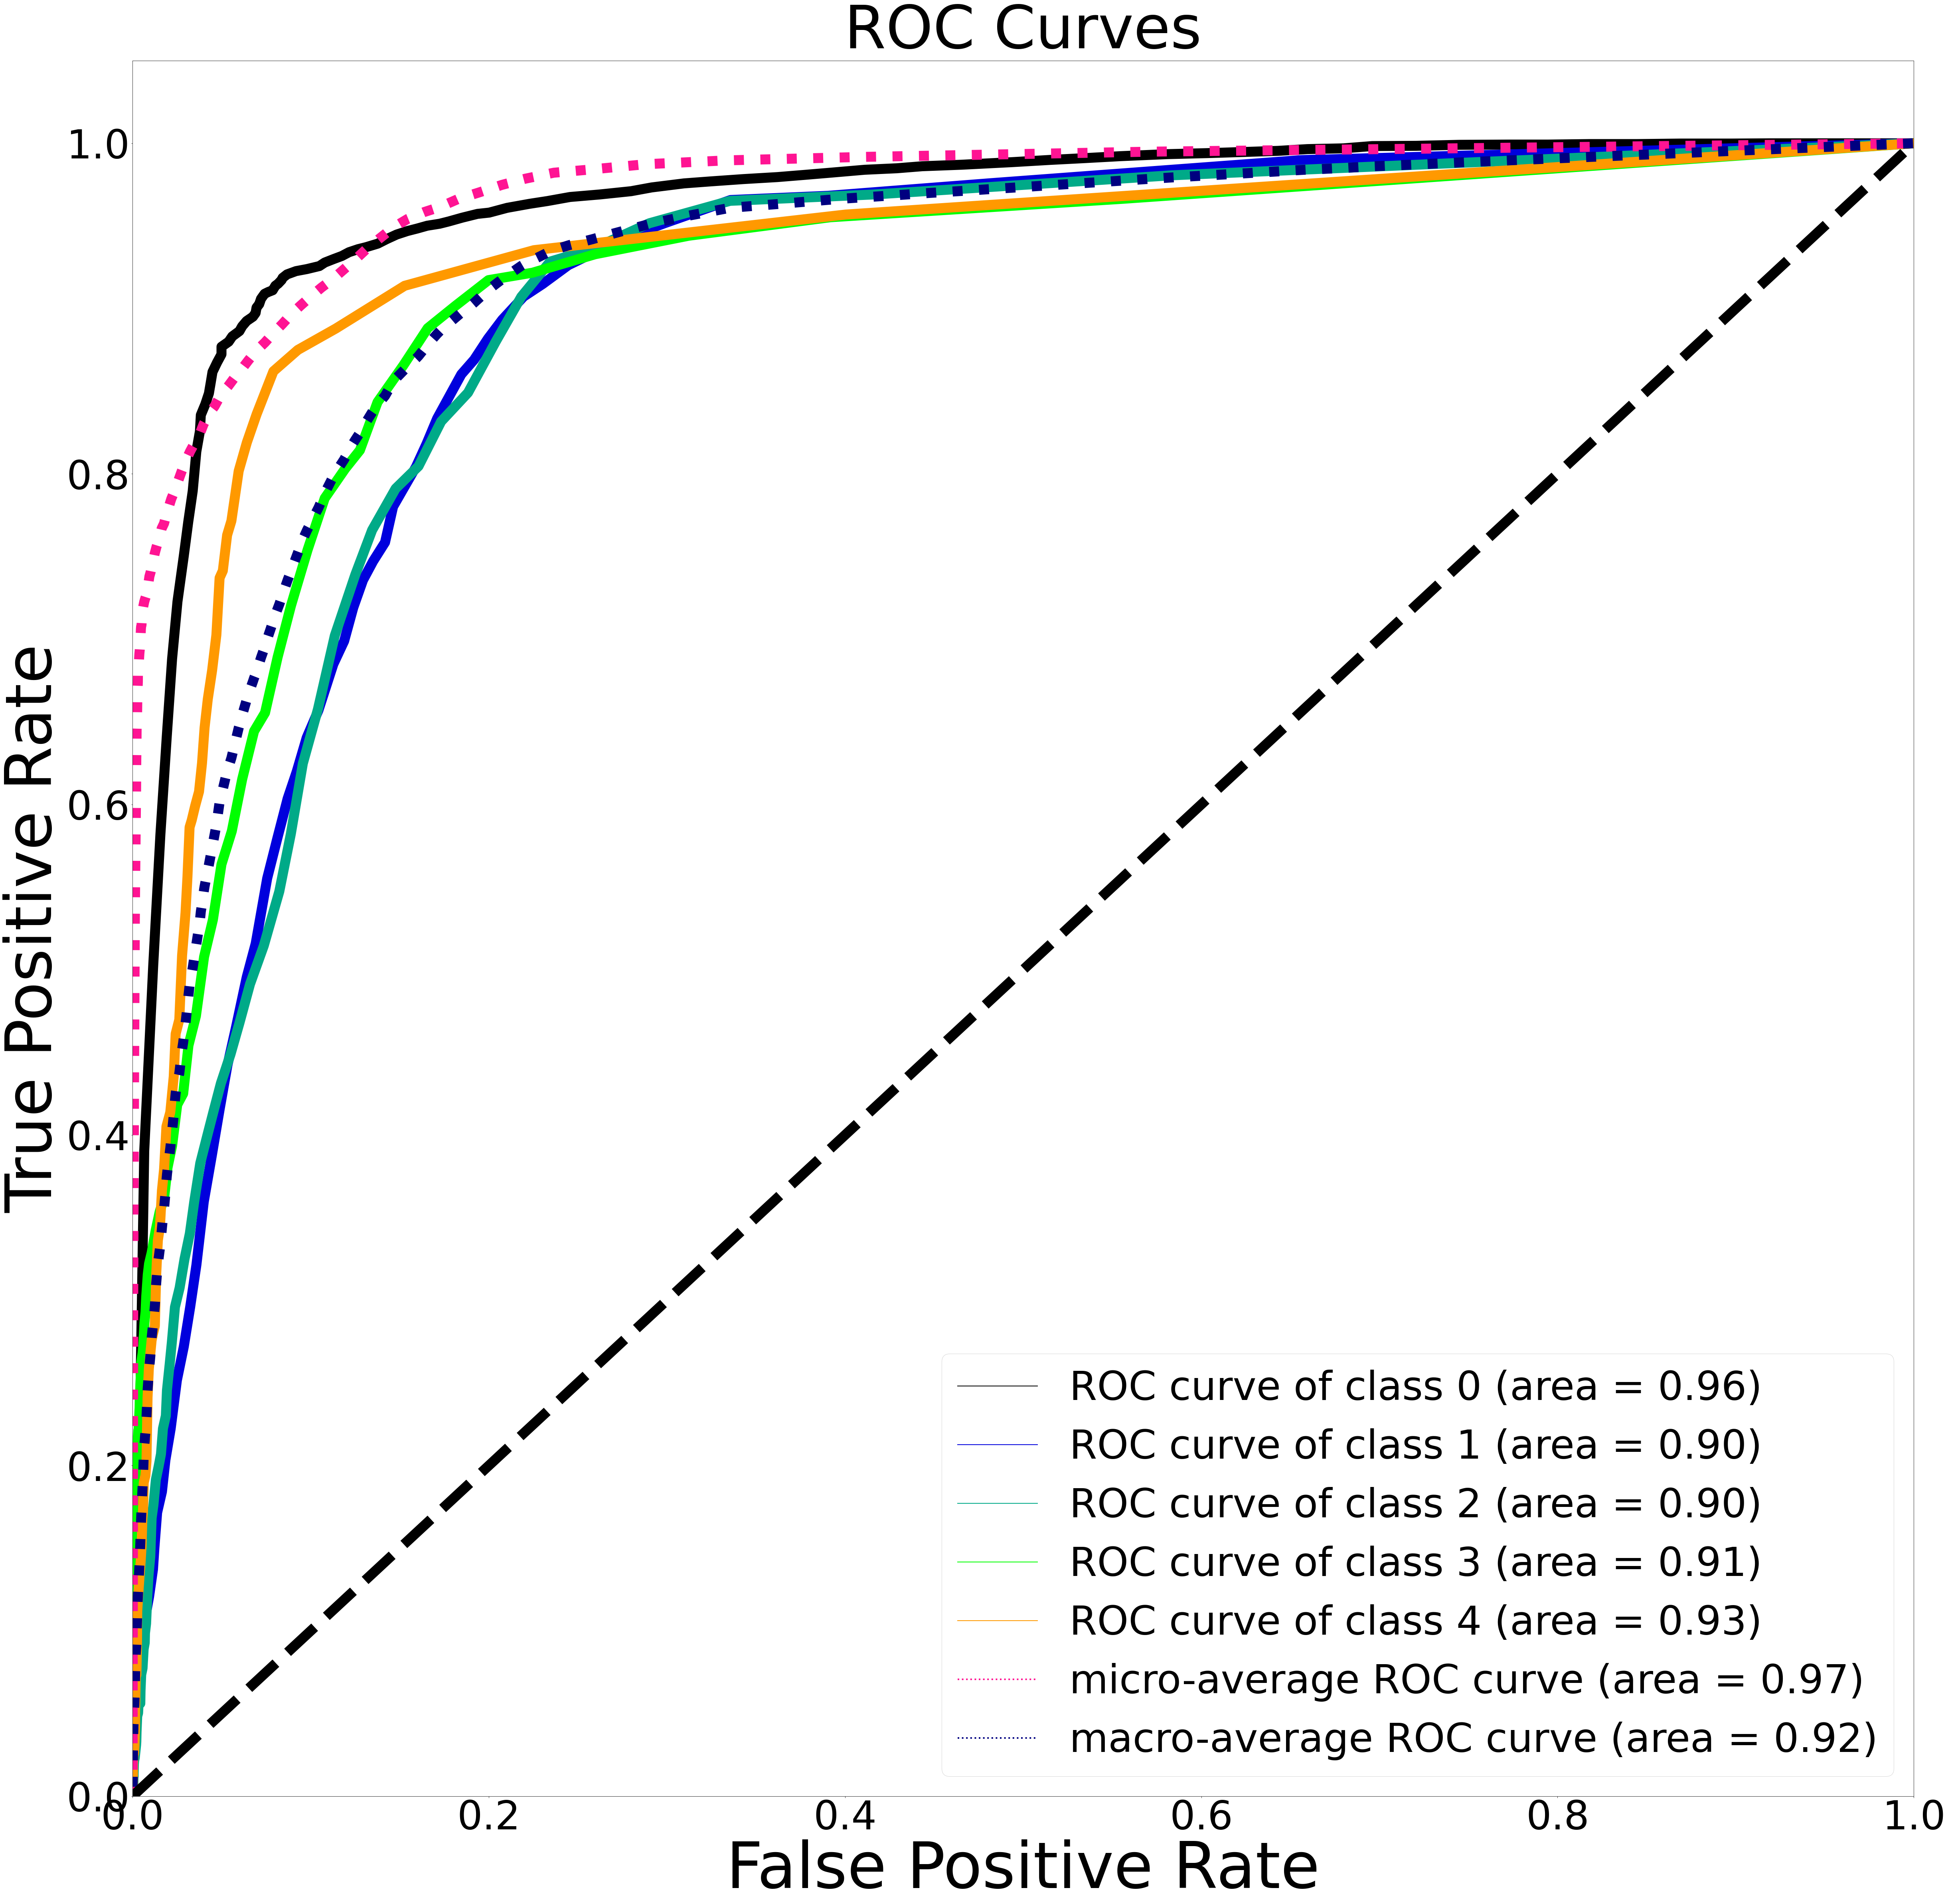

In [7]:
#Random Forest Classifier best Tree counts
print ("Testing Original Data ML performance")
championsTree = RandomForestClassifier(class_weight='balanced')
championsTree.fit(X_train,y_train)
predict_tree = championsTree.predict(X_val)
print("Random Forest Accuracy for the Raw Data:" , accuracy_score(y_val, predict_tree))
plot_graphs(championsTree,X_val,y_val, predict_tree)